In [34]:
from keras.datasets import mnist

#loading the MNIST datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(y_train.shape)

(60000,)


In [35]:
print(y_test.shape)
print(x_test.shape)
print(len(x_train))

(10000,)
(10000, 28, 28)
60000


# Let's look the images of dataset using 
1.Using OpenCv

2.Using Matplotlib

In [36]:
import cv2
import numpy as np

#using opencv to display six random images from the mnist dataset
for i in range(0,6):
    random_num = np.random.randint(0,len(x_train))
    img = x_train[random_num]
    window_name = "Random Sample #" + str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

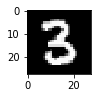

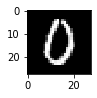

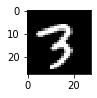

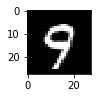

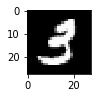

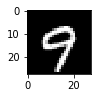

In [37]:
import matplotlib.pyplot as plt
# %matplotlib inline

for i in range(0,6):
    k=330
    plt.subplot(k+1)
    random_num = np.random.randint(0,len(x_train))
    plt.imshow(x_train[random_num],cmap = plt.get_cmap('gray'))
    plt.show()


# Preparing our dataset for training

In [38]:
img_rows = x_train[0].shape[0]
print(img_rows)
img_cols = x_train[1].shape[0]
print(img_cols)

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)

x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

# storing the shape of the single image
input_shape = (img_rows, img_cols,1)

# Changing the data type to float 32
x_train =x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data from changing the range from (0,255) to (0,1)

x_train/=255
x_test/=255

print('x_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

28
28
x_train shape (60000, 28, 28, 1)
60000 train samples
10000 test samples


# One Hot Encoding for labels

In [39]:
from keras.utils import np_utils

# Now applying one hot encoding to outputs
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

print('Numbers of classes', str(y_test.shape[1]))
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print(num_pixels)
y_test[1]

Numbers of classes 10
784


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Creating our model

In [40]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as K
from keras.optimizers import SGD

# Creating the model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                 activation ='relu',
                input_shape = input_shape))

model.add(Conv2D(64,(3,3),activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.1), 
             metrics = ['accuracy'])
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# Training our model 

In [42]:
batch_size = 128
epochs = 5
history = model.fit(x_train,y_train,
                   batch_size = batch_size,epochs = epochs,
                   verbose=1,validation_data = (x_test,y_test))

score = model.evaluate(x_test,y_test,verbose = 0)
print("Test loss",score[0])
print("Test accuracy",score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 57s 955us/step - loss: 0.0847 - acc: 0.9745 - val_loss: 0.0386 - val_acc: 0.9864
Epoch 2/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0708 - acc: 0.9784 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0621 - acc: 0.9816 - val_loss: 0.0314 - val_acc: 0.9893
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0542 - acc: 0.9838 - val_loss: 0.0305 - val_acc: 0.9904
Epoch 5/5
60000/60000 [==============================] - 52s 868us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0310 - val_acc: 0.9902
Test loss 0.030960031801673903
Test accuracy 0.9902


# Plotting our losses

In [43]:
import matplotlib.pyplot as plt

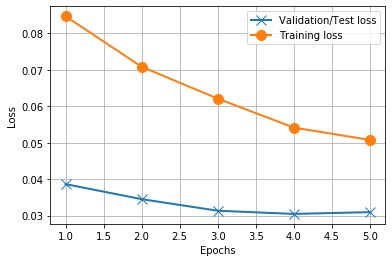

In [46]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label = 'Validation/Test loss')
line2 = plt.plot(epochs,loss_values,label = 'Training loss')
plt.setp(line1,linewidth = 2.0,marker= 'x',markersize = '10.0')
plt.setp(line2,linewidth = 2.0,marker= 'o',markersize = '10.0')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


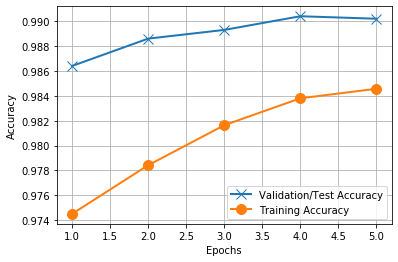

In [48]:
history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_acc_values,label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs,acc_values,label = 'Training Accuracy')
plt.setp(line1,linewidth = 2.0,marker= 'x',markersize = '10.0')
plt.setp(line2,linewidth = 2.0,marker= 'o',markersize = '10.0')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Saving our model

In [49]:
model.save('/home/abhi_kuks/DL/Trained Models/mnist_simple_cnn_5_Epochs.h5')
print('Model Saved')

Model Saved


In [53]:
from keras.models import load_model
classifier = load_model('/home/abhi_kuks/DL/Trained Models/mnist_simple_cnn_5_Epochs.h5')

# Let's input some of our test data and predict using the classifier

In [73]:
import cv2
import numpy as np

def draw_test(name,pred,input_im):
    black =[0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value = black)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(150,72),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)

for i in range(0,15):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
#     getting predictions
    res = str(classifier.predict_classes(input_im,1,verbose=0)[0])
    
    draw_test('Prediction',res,imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()
    

# Putting it all together

In [70]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

# Training_parameters

batch_size = 128
epochs = 5

# Loading the dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data as required by keras
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train =x_train.reshape(x_train.shape[0],img_rows,img_cols,1) 
x_test =x_test.reshape(x_test.shape[0],img_rows,img_cols,1)


# store the shape of a single image 
input_shape = (img_rows,img_cols,1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))


num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# creating the model 
model =Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])
print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_______________________________________________